In [1]:
import os
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import joblib

# Function to extract features using VGG16
def extract_features(img_path, model):
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x)
    return features.flatten()

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False)

# Root directory of the dataset
dataset_dir_potato = '../img/correct/Potato'
dataset_dir_corn = '../img/correct/Corn'
dataset_dir_tomato = '../img/correct/Tomato'

label_encoder = LabelEncoder()


In [2]:
def define_targets(dataset_dir):
    # Loop over the subdirectories and image files in the dataset directory
    X = []
    y = []
    for label in os.listdir(dataset_dir):
        label_dir = os.path.join(dataset_dir, label)
        if os.path.isdir(label_dir):
            for file in os.listdir(label_dir):
                # Construct the full image path
                img_path = os.path.join(label_dir, file)
                try:
                    # Extract features and append to list
                    features = extract_features(img_path, base_model)
                    X.append(features)
                    # Append the label
                    y.append(label)
                except Exception as e:
                    print(f"Error processing file {img_path}: {e}")
    return X, y

In [3]:
def train_test_split_func(X, y):
    y = label_encoder.fit_transform(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    return X_train, X_test, y_train, y_test

In [4]:
def decision_tree(X_train, X_test, y_train, y_test):
    clf = DecisionTreeClassifier()
    clf.fit(X_train, y_train)
    
    return clf

In [5]:
def random_forest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=42)
    clf.fit(X_train, y_train)
    
    return clf

In [6]:
def svc(X_train, X_test, y_train, y_test):
    clf = SVC(kernel='linear', probability=True)
    clf.fit(X_train, y_train)
    
    return clf

In [7]:
def knn(X_train, X_test, y_train, y_test):
    clf = KNeighborsClassifier(n_neighbors=10)
    clf.fit(X_train, y_train)
    
    return clf

In [8]:
def gradient_boost(X_train, X_test, y_train, y_test):
    clf = GradientBoostingClassifier(n_estimators=100, random_state=42, n_iter_no_change=10)
    clf.fit(X_train, y_train)
    
    return clf

In [9]:
# Definir os estimadores base
estimators = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(kernel='linear', probability=True)),
    ('knn', KNeighborsClassifier(n_neighbors=10))
]

# Definir o estimador final
final_estimator = GradientBoostingClassifier(n_estimators=100, random_state=42, n_iter_no_change=10)

In [10]:
def stacking(X_train, X_test, y_train, y_test, plant):
    # Configurar o StackingClassifier
    clf = StackingClassifier(
        estimators=estimators,
        final_estimator=final_estimator
    )
    
    # Treinar o modelo
    clf.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred = clf.predict(X_test)
    
    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    

    model_saved = joblib.dump(clf, f"clf_{plant}.joblib")

    return y_pred, model_saved

In [ ]:
X_tomato, y_tomato = define_targets(dataset_dir_tomato)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 115ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/s

In [12]:
X_train_tomato, X_test_tomato, y_train_tomato, y_test_tomato = train_test_split_func(X_tomato, y_tomato)

In [13]:
clfDT = decision_tree(X_train_tomato, X_test_tomato, y_train_tomato, y_test_tomato)

In [14]:
clfRF = random_forest(X_train_tomato, X_test_tomato, y_train_tomato, y_test_tomato)

In [15]:
clfSVC = svc(X_train_tomato, X_test_tomato, y_train_tomato, y_test_tomato)

In [16]:
clfKNN = knn(X_train_tomato, X_test_tomato, y_train_tomato, y_test_tomato)

In [17]:
clfGB = gradient_boost(X_train_tomato, X_test_tomato, y_train_tomato, y_test_tomato)

In [18]:
clfST, model = stacking(X_train_tomato, X_test_tomato, y_train_tomato, y_test_tomato, 'tomato')

Accuracy: 93.09%


In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

In [20]:
def plot_real_vs_pred(y_real, y_pred):
    plt.figure(figsize=(10, 6))
    
    # Plotar valores reais e preditos
    plt.plot(y_real, label="Valores Reais", marker='o')
    plt.plot(y_pred, label="Valores Preditos", marker='x')

    # Adicionar título e legendas
    plt.title("Real vs Predito")
    plt.xlabel("Amostra")
    plt.ylabel("Valor")
    plt.legend()
    plt.grid(True)
    
    # Mostrar o gráfico
    plt.show()


In [21]:
def calculate_errors(y_real, y_pred):
    mae = mean_absolute_error(y_real, y_pred)
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    
    return mae, mse, rmse


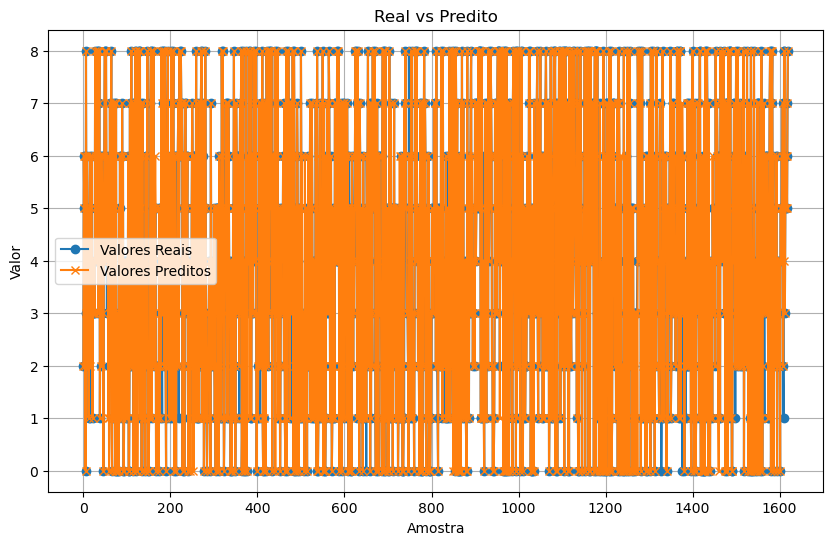

Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 0.48
Root Mean Squared Error (RMSE): 0.69


(0.1506172839506173, 0.47901234567901235, 0.6921071778843305)

In [22]:
# predST = clfDT.predict(X_test_tomato)
plot_real_vs_pred(y_test_tomato, clfST)
calculate_errors(y_test_tomato, clfST)

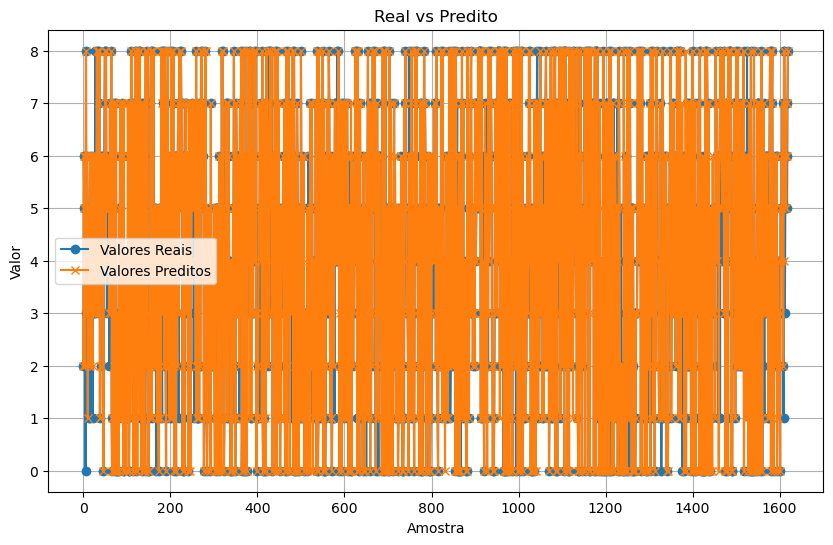

Mean Absolute Error (MAE): 0.45
Mean Squared Error (MSE): 1.53
Root Mean Squared Error (RMSE): 1.24


(0.45308641975308644, 1.5271604938271606, 1.2357833523021584)

In [23]:
predRF = clfRF.predict(X_test_tomato)
plot_real_vs_pred(y_test_tomato, predRF)
calculate_errors(y_test_tomato, predRF)

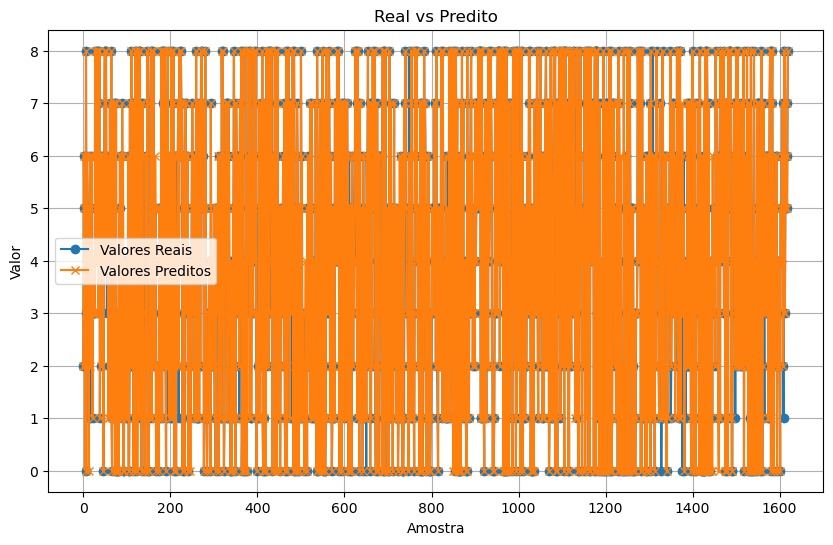

Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 0.47
Root Mean Squared Error (RMSE): 0.69


(0.14753086419753086, 0.4697530864197531, 0.6853853561462727)

In [24]:
predSVC = clfSVC.predict(X_test_tomato)
plot_real_vs_pred(y_test_tomato, predSVC)
calculate_errors(y_test_tomato, predSVC)

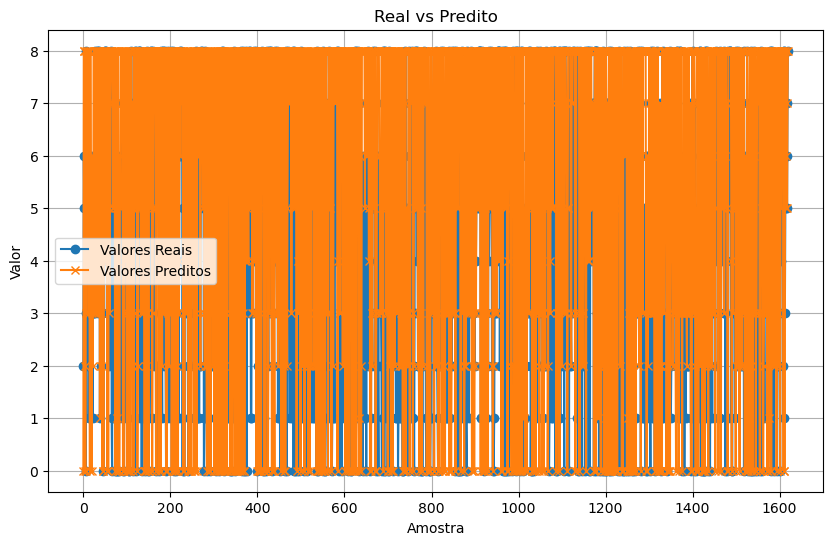

Mean Absolute Error (MAE): 2.32
Mean Squared Error (MSE): 12.99
Root Mean Squared Error (RMSE): 3.60


(2.3160493827160495, 12.987654320987655, 3.6038388311615233)

In [25]:
predKNN = clfKNN.predict(X_test_tomato)
plot_real_vs_pred(y_test_tomato, predKNN)
calculate_errors(y_test_tomato, predKNN)

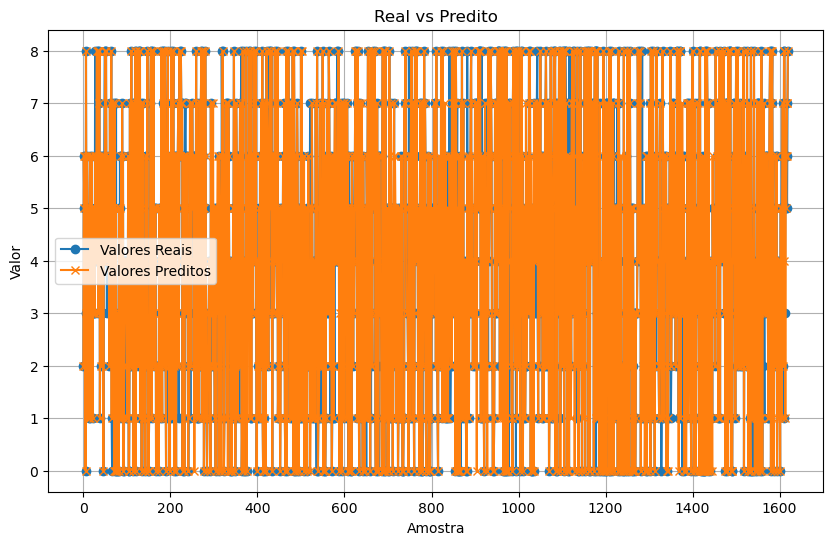

Mean Absolute Error (MAE): 0.31
Mean Squared Error (MSE): 1.03
Root Mean Squared Error (RMSE): 1.02


(0.31234567901234567, 1.0308641975308641, 1.0153148268053924)

In [26]:
predGB = clfGB.predict(X_test_tomato)
plot_real_vs_pred(y_test_tomato, predGB)
calculate_errors(y_test_tomato, predGB)

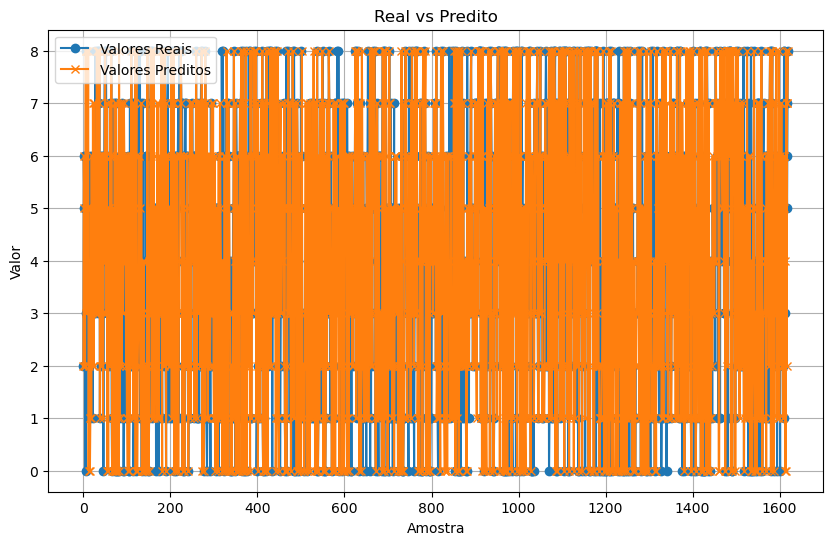

Mean Absolute Error (MAE): 1.35
Mean Squared Error (MSE): 5.48
Root Mean Squared Error (RMSE): 2.34


(1.3462962962962963, 5.484567901234568, 2.341915434261999)

In [27]:
predDT = clfDT.predict(X_test_tomato)
plot_real_vs_pred(y_test_tomato, predDT)
calculate_errors(y_test_tomato, predDT)

In [27]:
from google.cloud import storage
import joblib
import tempfile

temp_dir = tempfile.mkdtemp()

# Configuração do Google Cloud Storage
BUCKET_NAME = 'ensemble-models-tcc'



In [28]:
def load_model(name_model):
    client = storage.Client()
    bucket = client.bucket(BUCKET_NAME)
    blob = bucket.blob(f"{name_model}.joblib")
    
    # Baixar o modelo para um diretório temporário
    temp_model_path = os.path.join(temp_dir, f"{name_model}.joblib")
    blob.download_to_filename(temp_model_path)
    
    # Carregar o modelo
    model = joblib.load(temp_model_path)
    return model


In [31]:
predS = load_model("clf_tomato")

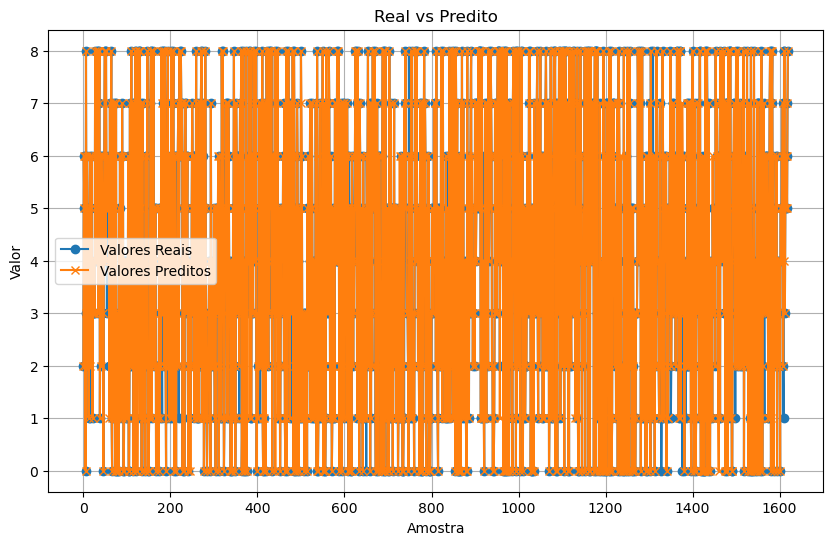

Mean Absolute Error (MAE): 0.14
Mean Squared Error (MSE): 0.43
Root Mean Squared Error (RMSE): 0.66


(0.13765432098765432, 0.4327160493827161, 0.6578115606940305)

In [39]:
#predST = predS.predict(X_test_tomato)
plot_real_vs_pred(y_test_tomato, clfST)
calculate_errors(y_test_tomato, clfST)

In [5]:
y_pred_test_without_opencv = [2, 4, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 4] + [2]*10 + [2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1] + [2] * 6 + [1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1] + [2] * 13 + [1] + [2] * 5 + [1] + [2] * 10

In [7]:
y_pred_test_with_opencv = [2, 4, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 4] + [2]*12 + [1, 2, 2, 2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1] + [2] * 6 + [1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1] + [2] * 13 + [1, 2, 2, 2, 2, 2, 1] + [2]* 10

In [8]:
y_real_test = [0]*10+[1]*10+[2]*10+[3]*10+[4]*10+[5]*10+[6]*10+[7]*10+[8]*10+[9]*10

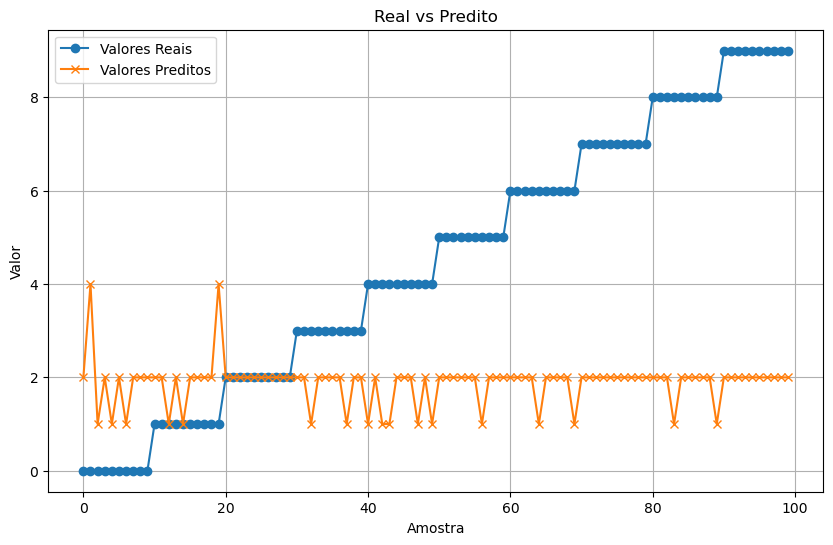

In [9]:
plot_real_vs_pred(y_real_test, y_pred_test_without_opencv)

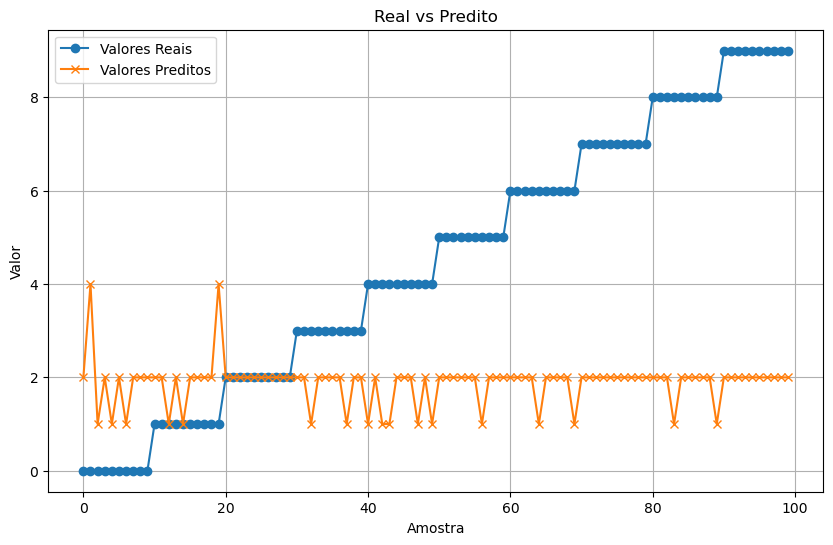

In [10]:
plot_real_vs_pred(y_real_test, y_pred_test_with_opencv)

In [13]:
from sklearn.naive_bayes import GaussianNB

In [46]:
def naive(X_train, X_test, y_train, y_test, plant):
    gnb = GaussianNB()
    # Treinar o modelo
    gnb.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred = gnb.predict(X_test)
    
    # Calcular a acurácia
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    

    model_saved = joblib.dump(gnb, f"clfNaive_{plant}.joblib")

    return y_pred, model_saved

In [47]:

# Fazer previsões
y_pred, modelNaive = naive(X_train_tomato, X_test_tomato, y_train_tomato, y_test_tomato, 'tomato')
accuracy = accuracy_score(y_test_tomato, y_pred)
accuracy

Accuracy: 38.70%


0.387037037037037

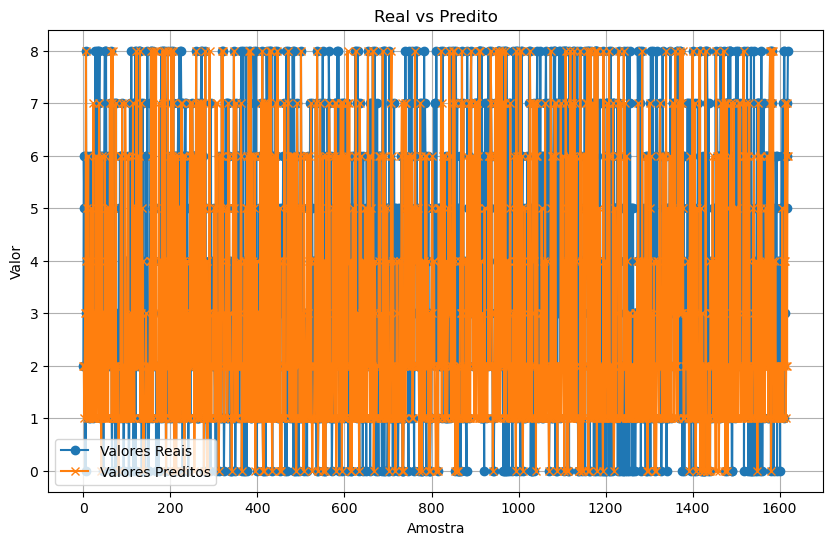

Mean Absolute Error (MAE): 1.86
Mean Squared Error (MSE): 7.86
Root Mean Squared Error (RMSE): 2.80


(1.862962962962963, 7.862962962962963, 2.8040975309291514)

In [43]:
plot_real_vs_pred(y_test_tomato, y_pred)
calculate_errors(y_test_tomato, y_pred)

In [55]:
accuracy = accuracy_score(y_test_tomato, predGB)
accuracy

0.8567901234567902